In [2]:
import numpy as np
from fireballpy import Fireball
from ase import Atoms
from ase.visualize import view
from ase.md.verlet import VelocityVerlet
from ase.geometry import distance
from ase.units import fs
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
import matplotlib.pyplot as plt

atoms = Atoms(symbols=['C', 'H', 'H', 'H', 'H'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       ( -0.6533, -0.6533, -0.6533),
                       (-0.6533, 0.6533, 0.6533),
                       ( 0.6533, -0.6533, 0.6533),
                       ( 0.6533, 0.6533, -0.6533)])

In [3]:
atoms.calc = Fireball(fdata='biology')
MaxwellBoltzmannDistribution(atoms, temperature_K=300)
dyn = VelocityVerlet(atoms, trajectory='dinamic.traj', 
                     logfile='dinamic.log', timestep=0.2 * fs)

In [4]:
ETOT=[]
Ec=[]
F=[]
time=[]
for i in range(1000):
    dyn.run(1)
    ETOT.append(atoms.get_total_energy())
    time.append(i)
    f=atoms.get_forces()
    Ec.append(atoms.get_kinetic_energy())
    m=np.sum(np.linalg.norm(f, axis=1))
    F.append(m)

Text(0, 0.5, 'Energy (eV)')

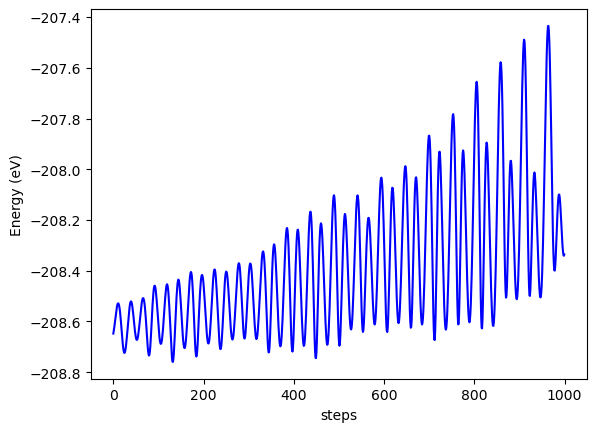

In [5]:
plt.plot(time, ETOT, label='ETOT', color='b')
plt.xlabel('steps')
plt.ylabel('Energy (eV)')

Text(0, 0.5, 'Ec')

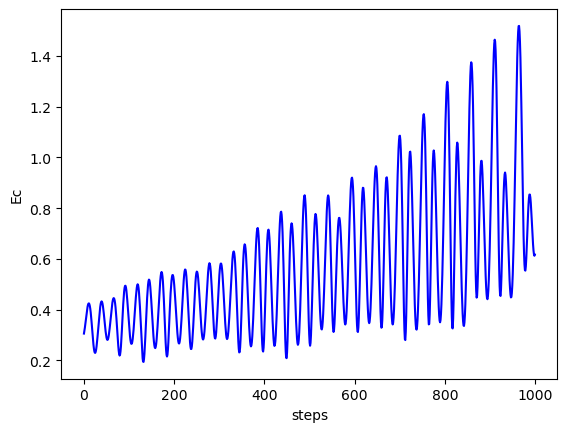

In [6]:
plt.plot(time, Ec, label='Ec', color='b')
plt.xlabel('steps')
plt.ylabel('Ec')

Text(0, 0.5, 'suma_atom(sqrt(fi^2))')

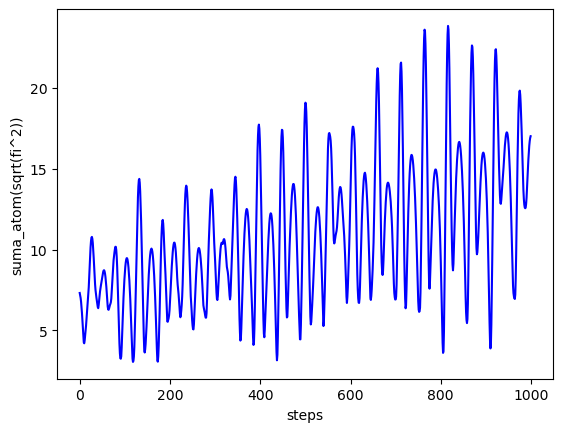

In [7]:
plt.plot(time, F, label='F', color='b')
plt.xlabel('steps')
plt.ylabel('suma_atom(sqrt(fi^2))')

In [ ]:
from ase.io.trajectory import Trajectory
traj = Trajectory('dinamic.traj')

Text(0, 0.5, 'Energy (eV)')

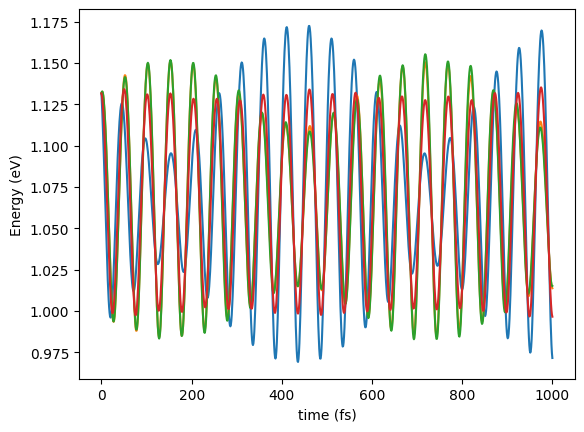

In [8]:
distances = []
from ase.io.trajectory import Trajectory
traj = Trajectory('dinamic.traj')
index_atom1 = 0
index_atom2 = 1

for index_atom2 in [1,2,3,4]:
    aux=[]
    for frame in traj:
        pos_atom1 = frame[index_atom1].position
        pos_atom2 = frame[index_atom2].position
        d = np.linalg.norm(pos_atom1 - pos_atom2)
        aux.append(d)
    distances.append(aux)
    
for d in distances:
    plt.plot(time, d)
plt.xlabel('time (fs)')
plt.ylabel('Energy (eV)')

In [9]:
view(traj[1], viewer='x3d')

In [10]:
view(traj[-1], viewer='x3d')

In [11]:
import nglview as nv
from ase.io.trajectory import Trajectory
view = nv.show_asetraj(traj)
view

ModuleNotFoundError: No module named 'nglview'